In [1]:
import pandas as pd
import numpy as np

In [4]:
# Specify the columns you need here
cem_col = {"albums": [],
           "artists": [],
           "songs": []}
marlize_col = {"albums": ["_id", "id_artist", "genre", "publicationDate"],
               "artists": ["_id", "location"],
               "songs": ["id_album", "award"]}
joris_col = {"albums": ["_id", "id_artist"],
             "artists": ["_id", "type", "gender", "members"],
             "songs": ["id_album", "genre"]}
ppl_col = [cem_col, marlize_col, joris_col]

# get unique values of columns needed
albums_col = list(set(np.concatenate([d["albums"] for d in ppl_col])))
artists_col = list(set(np.concatenate([d["artists"] for d in ppl_col])))
songs_col = list(set(np.concatenate([d["songs"] for d in ppl_col])))

# assuming the data folders are in your local folder
albums_data = pd.read_csv("wasabi_albums.csv/wasabi_albums.csv", usecols=albums_col)
artists_data = pd.read_csv("wasabi_artists.csv/wasabi_artists.csv", usecols=artists_col)
songs_data = pd.read_csv("wasabi_songs.csv/wasabi_songs.csv", sep="\t", usecols=songs_col)

/home/joris/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
display("albums", albums_data.head())
display("artists", artists_data.head())
display("songs", songs_data.head())

'albums'

,_id,genre,id_artist,publicationDate
0,ObjectId(5714debb25ac0d8aee34d59a),Alternative Rock,ObjectId(56d7e91b6b60c09814f93e4a),1997
1,ObjectId(5714debb25ac0d8aee34d59b),Alternative Rock,ObjectId(56d7e91b6b60c09814f93e4a),1999
2,ObjectId(5714debb25ac0d8aee34d59c),Alternative Rock,ObjectId(56d7e91b6b60c09814f93e4a),2002
3,ObjectId(5714debb25ac0d8aee34d59d),Alternative Rock,ObjectId(56d7e91b6b60c09814f93e4a),2005
4,ObjectId(5714debb25ac0d8aee34d59e),NaN,ObjectId(56d7e91b6b60c09814f93e4a),NaN


'artists'

,_id,gender,location,members,type
0,ObjectId(56d7e91b6b60c09814f93e4a),NaN,"{""id_city_musicbrainz"":""6e2d2d30-dbc9-4d27-99f...","[{""id_member_musicbrainz"":""3ec05e94-bf6e-439f-...",Group
1,ObjectId(56d7e91c6b60c09814f93e4c),NaN,"{""id_city_musicbrainz"":"""",""country"":""Japan"",""c...","[{""id_member_musicbrainz"":""82bd3da4-7085-40b8-...",Group
2,ObjectId(56d7e91d6b60c09814f93e4e),NaN,"{""id_city_musicbrainz"":"""",""country"":""Netherlan...","[{""id_member_musicbrainz"":""2931cbb9-56a0-4a96-...",Group
3,ObjectId(56d7e91e6b60c09814f93e50),NaN,"{""id_city_musicbrainz"":"""",""country"":"""",""city"":""""}",[],NaN
4,ObjectId(56d7e91e6b60c09814f93e52),NaN,"{""id_city_musicbrainz"":"""",""country"":""United St...","[{""id_member_musicbrainz"":""2f647f4c-6272-4ad9-...",Group


'songs'

,award,genre,id_album
0,NaN,NaN,ObjectId(5714debb25ac0d8aee34d59a)
1,NaN,NaN,ObjectId(5714debb25ac0d8aee34d59a)
2,NaN,NaN,ObjectId(5714debb25ac0d8aee34d59a)
3,NaN,NaN,ObjectId(5714debb25ac0d8aee34d59a)
4,NaN,NaN,ObjectId(5714debb25ac0d8aee34d59a)


# EDA

In [81]:
print(albums_data.shape)
print("NA:\n", albums_data.isna().sum())
print("dtypes:\n", albums_data.dtypes)

(208743, 4)
NA:
 _id                     0
genre              122553
id_artist               0
publicationDate     66991
dtype: int64
dtypes:
 _id                object
genre              object
id_artist          object
publicationDate    object
dtype: object


<AxesSubplot:ylabel='Frequency'>

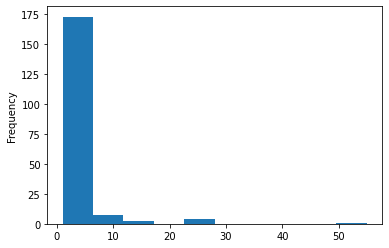

In [97]:
albums_data["genre"].value_counts().value_counts().plot(kind="hist")

In [119]:
albums_data["genre"].unique()

array(['Alternative Rock', nan, 'Death Metal', 'Rock', 'Emo',
       'Heavy Metal', 'Progressive Metal', 'Deathcore', 'Synthpop',
       'Post-Hardcore', 'Classical', 'Neofolk', 'Pop Punk',
       'Thrash Metal', 'Dark Wave', 'MPB', 'Indie Rock', 'Gothic Metal',
       'Doom Metal', 'Post-Punk', 'Pop Rock', 'Metalcore', 'Black Metal',
       'Sludge Metal', 'Experimental Rock', 'Pop', 'Melodic Metalcore',
       'Hardcore Punk', 'New Wave', 'Europop', 'Brutal Death Metal',
       'Hip Hop', 'Punk Rock', 'Electronic Rock', 'Groove Metal',
       'Math Rock', 'Grindcore', 'Melodic Death Metal', 'Industrial Rock',
       'Psychedelic Rock', 'K-Pop', 'Piano Rock', 'EBM', 'Disco', 'Funk',
       'Country', 'Alternative Hip Hop', 'Christian Rock', 'Screamo',
       'Children&apos;s Music', 'Industrial Metal', 'Hard Rock', 'Folk',
       'Indie Pop', 'Progressive Rock', 'Street Punk', 'Jazz Fusion',
       'Industrial', 'Avant-garde Metal', 'R&amp;B', 'Teen Pop', 'Jazz',
       'Contemporary 

In [129]:
[genre for genre in albums_data["genre"].unique() if type(genre) == type("") and "rock" in genre.lower()]
np.where("Rock" in albums_data["genre"].convert_dtypes(str))

(array([], dtype=int64),)

In [134]:
albums_data["genre"].unique()

array(['Alternative Rock', nan, 'Death Metal', 'Rock', 'Emo',
       'Heavy Metal', 'Progressive Metal', 'Deathcore', 'Synthpop',
       'Post-Hardcore', 'Classical', 'Neofolk', 'Pop Punk',
       'Thrash Metal', 'Dark Wave', 'MPB', 'Indie Rock', 'Gothic Metal',
       'Doom Metal', 'Post-Punk', 'Pop Rock', 'Metalcore', 'Black Metal',
       'Sludge Metal', 'Experimental Rock', 'Pop', 'Melodic Metalcore',
       'Hardcore Punk', 'New Wave', 'Europop', 'Brutal Death Metal',
       'Hip Hop', 'Punk Rock', 'Electronic Rock', 'Groove Metal',
       'Math Rock', 'Grindcore', 'Melodic Death Metal', 'Industrial Rock',
       'Psychedelic Rock', 'K-Pop', 'Piano Rock', 'EBM', 'Disco', 'Funk',
       'Country', 'Alternative Hip Hop', 'Christian Rock', 'Screamo',
       'Children&apos;s Music', 'Industrial Metal', 'Hard Rock', 'Folk',
       'Indie Pop', 'Progressive Rock', 'Street Punk', 'Jazz Fusion',
       'Industrial', 'Avant-garde Metal', 'R&amp;B', 'Teen Pop', 'Jazz',
       'Contemporary 